# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [32]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

# check for missing data
missing_data = sensor.isnull().sum().sum()
if missing_data > 0:
    # remove rows with missing data
    sensor.dropna(inplace=True)


How many rows and columns are in our data?

In [5]:
# Your code here:
num_rows, num_cols = sensor.shape
num_rows


1751

In [22]:
num_cols

12

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

Assign the time series index to the dataframe's index.

In [23]:
# specify start and end times
start_time = "2018-01-01 00:00:00"
end_time = "2018-01-01 00:29:10"

# create a time series index with the same number of periods as the number of rows in sensor
sensor['time_index'] = pd.date_range(start = start_time, end = end_time, periods= num_rows)

freq = pd.infer_freq(sensor['time_index'])

# set the index of the sensor dataframe to the time_index
sensor.set_index('time_index', inplace=True)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

/tmp/ipykernel_769751/2165622978.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


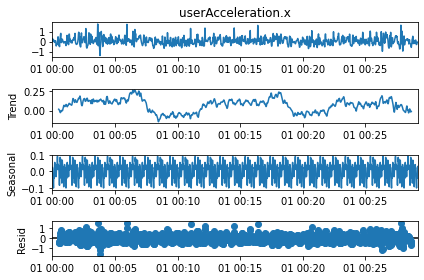

In [29]:
# Your code here:
import statsmodels.api as sm

# Decompose the time series and plot the decomposed plot of userAcceleration.x
res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], period=60)
fig = res.plot()
fig.show()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

/tmp/ipykernel_769751/51806060.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


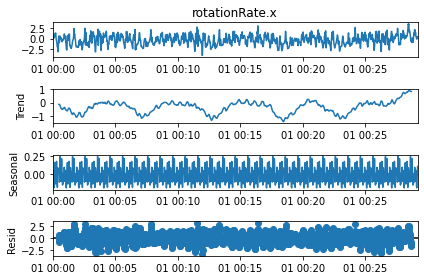

In [31]:
# Decompose the time series of rotationRate.x and plot the decomposed plot
res = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], period=60)
fig = res.plot()
fig.show()


# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

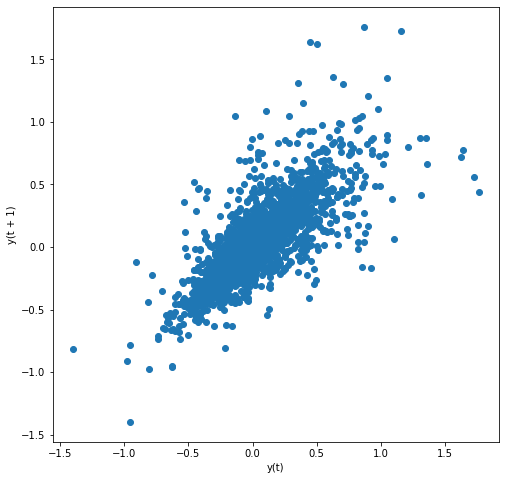

In [34]:
# plot the lag plot of userAcceleration.x
plt.figure(figsize=(8, 8))
pd.plotting.lag_plot(sensor['userAcceleration.x'])
plt.show()

Create a lag plot for `rotationRate.x`

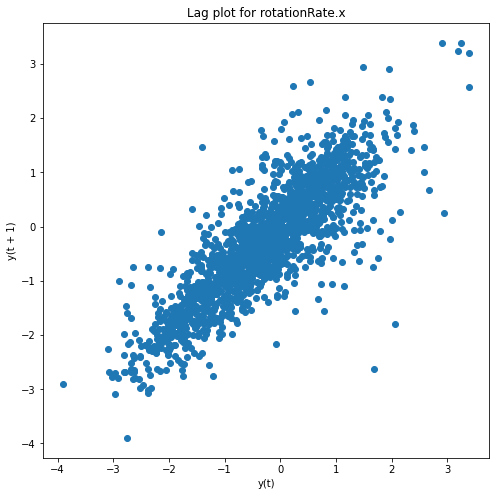

In [36]:
# Your code here:

fig, ax = plt.subplots(figsize=(8,8))
pd.plotting.lag_plot(sensor['rotationRate.x'], ax=ax)
ax.set_title('Lag plot for rotationRate.x')
plt.show()

What are your conclusions from both visualizations?

## Your conclusions here:

Due to the diagonal slope from bottom left to top right on both:
This indicates that high values tend to be followed by high values, and low values tend to be followed by low values. 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [38]:
# Your code here:

from statsmodels.tsa.stattools import adfuller

# Perform ADF test on userAcceleration.x
result_acc = adfuller(sensor['userAcceleration.x'])
print(f'ADF Statistic for userAcceleration.x: {result_acc[0]:.3f}')
print(f'p-value: {result_acc[1]:.3f}')
print('Critical Values:')
for key, value in result_acc[4].items():
    print(f'   {key}: {value:.3f}')

# Perform ADF test on rotationRate.x
result_rot = adfuller(sensor['rotationRate.x'])
print(f'\nADF Statistic for rotationRate.x: {result_rot[0]:.3f}')
print(f'p-value: {result_rot[1]:.3f}')
print('Critical Values:')
for key, value in result_rot[4].items():
    print(f'   {key}: {value:.3f}')


ADF Statistic for userAcceleration.x: -17.958
p-value: 0.000
Critical Values:
   1%: -3.434
   5%: -2.863
   10%: -2.568

ADF Statistic for rotationRate.x: -5.270
p-value: 0.000
Critical Values:
   1%: -3.434
   5%: -2.863
   10%: -2.568


What are your conclusions from this test?

## Your conclusions here:
both userAcceleration.x and rotationRate.x have ADF statistic values that are less than the critical values at the 1%, 5%, and 10% significance levels. This means that we can reject the null hypothesis that both series are non-stationary and conclude that they are stationary at a significance level of at least 10%.


## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [39]:
order = (2, 0, 1)

In [40]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [43]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html
model = sm.tsa.ARIMA(y_train, order=order,  freq="S")


/home/graham/anaconda3/envs/ironhack/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


In [44]:
# 2. Fit the model:

fit = model.fit()

In [50]:
# 3. Predict: create y_pred:
# calculate the number of steps for the forecast
n_steps = len(y_test) - 1

# make predictions with the fitted model
y_pred = fit.predict(start=y_test.index[0], end=y_test.index[-1])



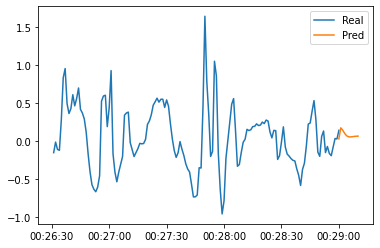

In [51]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [55]:
# Your code here:
from statsmodels.tools.eval_measures import rmse

rmse(y_pred, y_test)

0.21742521557690855